# Assigment 5

In [3]:
import sympy as sym 

from sympy import Derivative, factorial, symbols, simplify, cos, sin, sqrt, DiracDelta, I, Rational
from sympy.matrices import SparseMatrix
from sympy.physics.mechanics import *
from sympy.physics.quantum import Commutator, Dagger, Operator

from IPython.display import Math, display
init_vprinting()

## Exponentials of operators

In [4]:
A = Operator('A')
B = Operator('B')
alpha = symbols('alpha')

In [5]:
def exp_taylor(operator=A, terms=4):
    e = 0
    for n in range(0, terms):
        e += operator**n / factorial(n)
    return e

def Q1a_expand(operator=A, terms=4, bookkeeping=alpha):
    Op_Al = operator*alpha
    Out = exp_taylor(Op_Al, terms) * B * exp_taylor(-Op_Al, terms)
    return Out.expand().collect(alpha)

### a) 
We know: $$e^\alpha = \sum_{n=0}^{n=\infty} \frac{\alpha^n}{n!} = 1 + \alpha + \frac{\alpha^2}{2!} + \frac{\alpha^3}{3!} + \cdots$$

We can apply this to operators too: 
$$e^A = \sum_{n=0}^{n=\infty} \frac{A^n}{n!} = I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \cdots$$

$$\therefore e^A B e^{-A} = \left[\sum_{n=0}^{n=\infty} \frac{A^n}{n!}\right] B \left[\sum_{n=0}^{n=\infty} (-1)^n \frac{A^n}{n!}\right] = \left[I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \cdots \right] B \left[I - A + \frac{A^2}{2!} - \frac{A^3}{3!} + \cdots \right]$$

Now let's use Sympy to expand and simplify this: 

Let's introduce bookkeeping term $\alpha$ into the exponentials.

For 4 terms: 

$e^{\alpha A} B e^{-\alpha A} =$

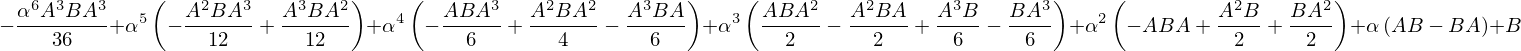

In [6]:
Q1a_expand(terms=4)

$\alpha$ is just a bookkeeping term, so let $\alpha = 1$ 

$\therefore e^{A} B e^{A}$

$= B + (AB-BA) + \left[-ABA + \frac{1}{2}(A^2B + BA^2)\right] + \frac{1}{2}\left[ABA^2 - A^2BA + \frac{1}{6}(A^3B - BA^3) \right] + \cdots$

$= B + [A, B] + \frac{1}{2!}[A^2B - 2ABA + BA^2] + \frac{1}{3!}[A^3B - 3A^2BA + 3ABA^2 - BA^3] + \cdots$

$= B + [A, B] + \frac{1}{2!}[A^2B - ABA - ABA + BA^2] + \frac{1}{3!}[A^3B - 3A^2BA + 3ABA^2 - BA^3] + \cdots$

$= B + [A, B] + \frac{1}{2!}[A, (AB-BA)] + \frac{1}{3!}[A^3B - 2A^2BA + ABA^2 - A^2BA + 2ABA^2 - BA^3] + \cdots$

$= B + [A, B] + \frac{1}{2!}[A, [A, B]] + \frac{1}{3!}[A, A^2B - 2BAB + BA^2] + \cdots$

$= B + [A, B] + \frac{1}{2!}[A, [A, B]] + \frac{1}{3!}[A, [A, [A,B]]] + \cdots$

## Rotation algebra 
### b) 

$$J_x = \frac{1}{2}(J_+ + J_-)$$

$$J_y = \frac{1}{2i}(J_+ - J_-)$$

$$[J_k, J_l] = i \varepsilon_{klm}J_m \Rightarrow [J_x, J_y] = i J_z \Rightarrow J_z = -i(J_x J_y - J_y J_x)$$

$(J_x)_{m_1, m_2}$ 

$= \left\langle j, m_1 \right| J_x \left| j, m_2 \right\rangle$

$= \frac{1}{2} \left\langle j, m_1 \right| J_+ + J_- \left| j, m_2 \right\rangle$

$= \frac{1}{2} \left\langle j, m_1 \right| [j(j+1)-m_2(m_2+1)]^\frac{1}{2} \left| j, m_2 +1 \right\rangle + \frac{1}{2} \left\langle j, m_1 \right| [j(j+1)-m_2(m_2-1)]^\frac{1}{2} \left| j, m_2-1 \right\rangle$

$= \frac{1}{2} [j(j+1)-m_2(m_2+1)]^\frac{1}{2} \delta_{m_1, m_2+1} + \frac{1}{2} [j(j+1)-m_2(m_2-1)]^\frac{1}{2} \delta_{m_1, m_2-1}$


$(J_y)_{m_1, m_2}$ 

$= \left\langle j, m_1 \right| J_x \left| j, m_2 \right\rangle$

$= \frac{1}{2i} \left\langle j, m_1 \right| J_+ - J_- \left| j, m_2 \right\rangle$

$= \frac{1}{2i} \left\langle j, m_1 \right| [j(j+1)-m_2(m_2+1)]^\frac{1}{2} \left| j, m_2 +1 \right\rangle - \frac{1}{2i} \left\langle j, m_1 \right| [j(j+1)-m_2(m_2-1)]^\frac{1}{2} \left| j, m_2-1 \right\rangle$

$= \frac{1}{2i} [j(j+1)-m_2(m_2+1)]^\frac{1}{2} \delta_{m_1, m_2+1} - \frac{1}{2i} [j(j+1)-m_2(m_2-1)]^\frac{1}{2} \delta_{m_1, m_2-1}$

In [22]:
def convert_rational(J, M1, M2):
    j = sym.sympify("{0}".format(J), rational=True)
    m1 = sym.sympify("{0}".format(M1), rational=True)
    m2 = sym.sympify("{0}".format(M2), rational=True)
    return j, m1, m2

def dirac_delta(x, y):
    if x-y == 0:
        dd = 1
    else:
        dd = 0
    return dd

def Func(J, M1, M2):
    j, m1, m2 = convert_rational(J, M1, M2)
    f1 = sqrt(j*(j+1)-m2*(m2+1)) * dirac_delta(m1, (m2+1))
    f2 = sqrt(j*(j+1)-m2*(m2-1)) * dirac_delta(m1, (m2-1))
    return f1.simplify(), f2.simplify()

def J_x(j=1/2):
    N = int(j*2 + 1)
    A = sym.zeros(N, N)
    for n in range(0, N, 1):
        m1 = j - n 
        for k in range(0, N, 1):
            m2 = j - k
            F1, F2 = Func(j, m1, m2)
            F = (F1 + F2)/2
            A[n, k] += F
    return A
    
def J_y(j=1/2):
    N = int(j*2 + 1)
    A = sym.zeros(N, N)
    for n in range(0, N, 1):
        m1 = j - n 
        for k in range(0, N, 1):
            m2 = j - k
            F1, F2 = Func(j, m1, m2)
            F = (F1 - F2) / (2*I)
            A[n, k] += F
    return A

def J_z(j=1/2):
    A = -I*(J_x(j)@J_y(j) - J_y(j)@J_x(j))
    return A

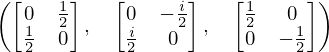

In [23]:
J_x(), J_y(), J_z() 

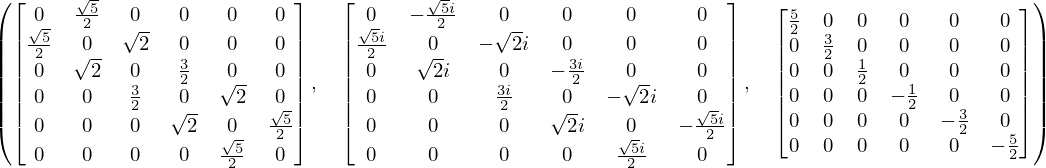

In [24]:
J_x(5/2), J_y(5/2), J_z(5/2)